In [75]:
import numpy as np
import pandas as pd
import tensorflow as tf
from scipy.stats import zscore
import matplotlib.pyplot as plt
from tensorflow import keras
import kerastuner as kt
from tensorflow.keras import layers
from scipy.optimize import curve_fit
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [76]:
tamanho_padrao=10
# Carregar e ler os dados do banco de dados original com 10000 termos
df = pd.read_csv("C:/BPL/IA/1D-CNN/PrimeiraIA/curvas_simuladas.csv")
df_filtrado = df.iloc[:tamanho_padrao, :]  # Mantém todas as colunas, mas apenas até a linha 10
df.head()
print(df.head())


   eixo_x  simulada_1  simulada_2  simulada_3  simulada_4  simulada_5  \
0     1.0    105.1360    105.5280    106.6499    107.8207    103.5516   
1    52.0     67.0455     66.6414     67.3209     69.5274     65.1185   
2   103.0     60.4566     59.9148     60.5177     62.9035     58.4704   
3   154.0     56.5791     55.9563     56.5142     59.0053     54.5580   
4   205.0     53.8214     53.1411     53.6669     56.2330     51.7756   

   simulada_6  simulada_7  simulada_8  simulada_9  ...  simulada_9992  \
0    110.6586    107.0193    107.9047    100.6937  ...       107.3969   
1     71.6526     68.8379     69.2800     62.2446  ...        68.9314   
2     64.9053     62.2333     62.5987     55.5937  ...        62.2776   
3     60.9346     58.3465     58.6669     51.6798  ...        58.3619   
4     58.1107     55.5823     55.8706     48.8962  ...        55.5772   

   simulada_9993  simulada_9994  simulada_9995  simulada_9996  simulada_9997  \
0       107.7924       109.5290       109.

In [77]:
# Função logarítmica para ajuste da curva
def log_func(x, a, b):
    return a * np.log(x+1) + b

Número de colunas: 10002
Curvas selecionadas para plot futuro:
[[105.136   67.0455  60.4566  56.5791  53.8214  51.6797  49.9284  48.4468
   47.1629  46.0301]
 [105.528   66.6414  59.9148  55.9563  53.1411  50.9546  49.1666  47.6541
   46.3434  45.1869]
 [106.6499  67.3209  60.5177  56.5142  53.6669  51.4555  49.6472  48.1175
   46.7919  45.6222]
 [107.8207  69.5274  62.9035  59.0053  56.233   54.0799  52.3193  50.8298
   49.5391  48.4003]
 [103.5516  65.1185  58.4704  54.558   51.7756  49.6146  47.8475  46.3527
   45.0572  43.9142]
 [110.6586  71.6526  64.9053  60.9346  58.1107  55.9175  54.1241  52.607
   51.2922  50.1322]
 [107.0193  68.8379  62.2333  58.3465  55.5823  53.4355  51.68    50.1949
   48.9079  47.7724]
 [107.9047  69.28    62.5987  58.6669  55.8706  53.6988  51.9229  50.4206
   49.1187  47.97  ]
 [100.6937  62.2446  55.5937  51.6798  48.8962  46.7343  44.9665  43.471
   42.175   41.0315]
 [109.0029  70.4596  63.7924  59.8688  57.0784  54.9112  53.1391  51.6399
   50.3408

C:\Users\luisa\AppData\Local\Temp\ipykernel_43728\1945943203.py:50: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


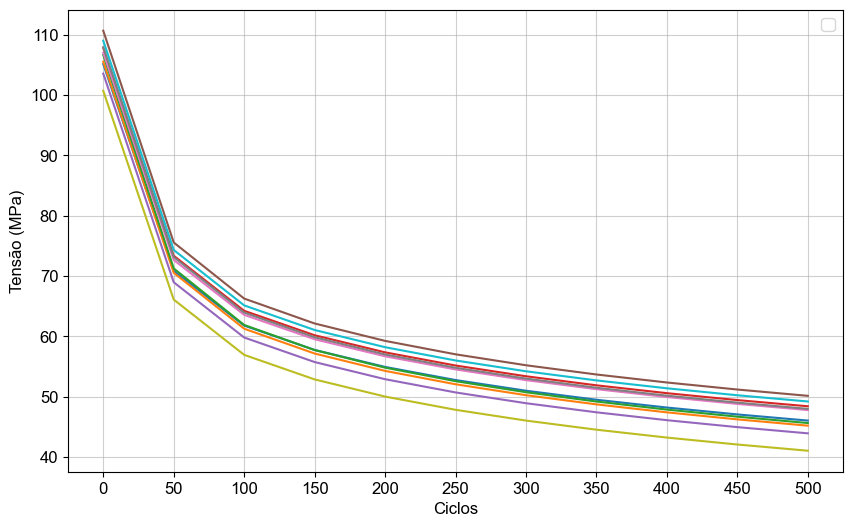

In [ ]:
#Este côdigo lê corretamente o banco, faz o ajuste, separa os coeficientes e criar as listas 

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d

curvas = []
coeficientes = []

# Processamento dos dados
numero_colunas = df_filtrado.shape[1]
print(f'Número de colunas: {numero_colunas}')

x_values = df_filtrado.iloc[:, 0].dropna().values  # Valores de X
y_values = df_filtrado.iloc[:, 1:].dropna().values  # Todas as colunas de Y

curvas = y_values.T  

def log_func(x, a, b):
    return a * np.log(x + 1) + b 

for y in curvas:
    popt, _ = curve_fit(log_func, x_values, y, maxfev=10000)  
    coeficientes.append(popt)

# Converter para arrays numpy
curvas = np.array(curvas)
coeficientes = np.array(coeficientes)

curvas_selecionadas = curvas[:10]

print(f'Curvas selecionadas para plot futuro:\n{curvas_selecionadas}')

x_original = np.linspace(0, 500, curvas.shape[1])  # X original das curvas
x_novo = np.arange(0, 501, 50)  # X desejado com 11 pontos

# Interpolação para ajustar os tamanhos pra conseguir plotar
curvas_interp = np.array([interp1d(x_original, y, kind='linear')(x_novo) for y in curvas_selecionadas])


plt.rcParams.update({'font.family': 'Arial', 'font.size': 12})

# Plotando as curvas corrigidas
plt.figure(figsize=(10, 6))
for i in range(10):
    plt.plot(x_novo, curvas_interp[i])  # Legendas numeradas

plt.xlabel('Ciclos')
plt.ylabel('Tensão (MPa)')
plt.xticks(x_novo)
plt.legend()
plt.grid(True, alpha=0.6)
plt.savefig("plot_1000_curvas.png", dpi=300)
plt.show()



In [ ]:
#Normalização das curvas que vão servir de entrada para o modelo

curvas = zscore(curvas, axis=0)
#coeficientes=zscore(coeficientes, axis=0)
curva_normalizada = curvas[:1]
print(f'curvas normalizadas:{curvas[:1]}')

# Separar os dados em treino e validação
X_train, X_val, y_train, y_val = train_test_split(curvas, coeficientes, test_size=0.2, random_state=42)
print(f'valores normalizados:{X_train, X_val, y_train, y_val}')


curvas normalizadas:[[-0.49918149 -0.32446023 -0.29409136 -0.27625392 -0.26360955 -0.25377838
  -0.24574788 -0.23898738 -0.23312174 -0.22794166]]
valores normalizados:(array([[ 2.21884354,  2.5002467 ,  2.54404534, ...,  2.61985762,
         2.62763994,  2.63446637],
       [ 1.18209072,  1.28237177,  1.29729973, ...,  1.32262102,
         1.32517907,  1.32742463],
       [ 0.5192099 ,  0.41996929,  0.40231519, ...,  0.36999968,
         0.36653886,  0.36347359],
       ...,
       [-0.61168695, -0.36835714, -0.3262104 , ..., -0.24977807,
        -0.24164865, -0.2344705 ],
       [-0.59910102, -0.77684966, -0.80588759, ..., -0.85719557,
        -0.86257752, -0.86727861],
       [ 0.27266604,  0.29217903,  0.29502114, ...,  0.29976212,
         0.30025112,  0.30066612]]), array([[ 0.28294844,  0.5473629 ,  0.59157042, ...,  0.67053662,
         0.67886549,  0.68616166],
       [ 1.71483912,  1.67889841,  1.66991347, ...,  1.65163883,
         1.64952832,  1.64766438],
       [ 0.6644988

In [ ]:
#Modelo de IA

def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Input(shape=(tamanho_padrao,)))
    
    model.add(layers.Dense(units=hp.Int('units_1', min_value=64, max_value=512, step=32), activation='relu'))
    model.add(layers.Dense(units=hp.Int('units_2', min_value=64, max_value=256, step=32), activation='relu'))
    model.add(layers.Dense(2))  # Saída com os coeficientes a e b
    
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-3, 1e-4, 1e-5])), loss='mse', metrics=[keras.metrics.MeanAbsoluteError()])
    model.summary()
    return model

# Configuração do Keras Tuner

tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',  
    max_trials=20,
    executions_per_trial=1,
    directory='my_dir',
    project_name='intro_to_kt'
)

tuner.search(X_train, y_train, epochs=100, validation_data=(X_val, y_val), batch_size=10)

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner.hypermodel.build(best_hps)

callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=5)
history = best_model.fit(X_train, y_train, epochs=100, batch_size=20, validation_data=(X_val, y_val), callbacks=[callback])

# Avaliação do modelo
test_loss = best_model.evaluate(X_val, y_val)
print(f"Loss: {test_loss}")

# Gerar previsões
y_pred = best_model.predict(X_val)

a_real, b_real = y_val[:, 0], y_val[:, 1]
a_pred, b_pred = y_pred[:, 0], y_pred[:, 1]

a_pred_sel=a_pred[:1]
b_pred_sel=b_pred[:1]
print("Coeficientes reais (primeiras 3 amostras):")
print(a_real[:3], b_real[:3])

print("Coeficientes preditos (primeiras 3 amostras):")
print(a_pred[:1], b_pred[:1])

best_model.save("modelo1.h5")
best_model.save('my_model.keras')

num_amostras = range(len(y_val))



Reloading Tuner from my_dir\intro_to_kt\tuner0.json


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_39 (Dense)                │ (None, 416)            │         4,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 64)             │        26,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,394 (122.63 KB)

 Trainable params: 31,394 (122.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2781.8413 - mean_absolute_error: 34.3038 - val_loss: 1.2747 - val_mean_absolute_error: 0.7685
Epoch 2/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8662 - mean_absolute_error: 0.6219 - val_loss: 0.2414 - val_mean_absolute_error: 0.3370
Epoch 3/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1651 - mean_absolute_error: 0.2671 - val_loss: 0.0556 - val_mean_absolute_error: 0.1468
Epoch 4/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0384 - mean_absolute_error: 0.1263 - val_loss: 0.0209 - val_mean_absolute_error: 0.0929
Epoch 5/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0190 - mean_absolute_error: 0.0909 - val_loss: 0.0104 - val_mean_absolute_error: 0.0705
Epoch 6/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0080 - mean_absolute_error: 0.0623 - val_loss: 0.0056 - val_mean_absolute_error: 0.0539
Epoch 7/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0044 - mean_absolute_error:

Coeficientes reais (primeiras 3 amostras):
[-10.74494438 -10.99112526 -11.13481935] [113.9720955  118.40998479 115.35060918]
Coeficientes preditos (primeiras 3 amostras):
[-10.764737] [114.04517]


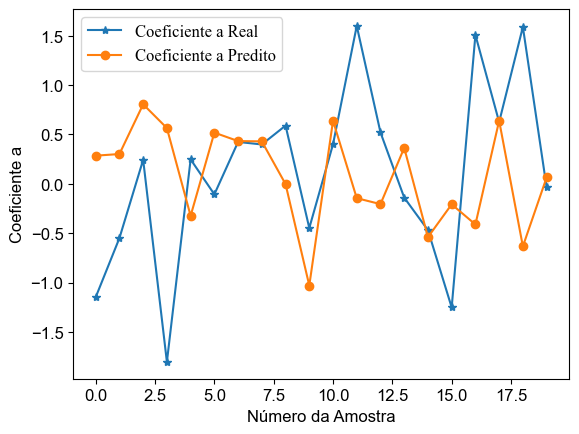

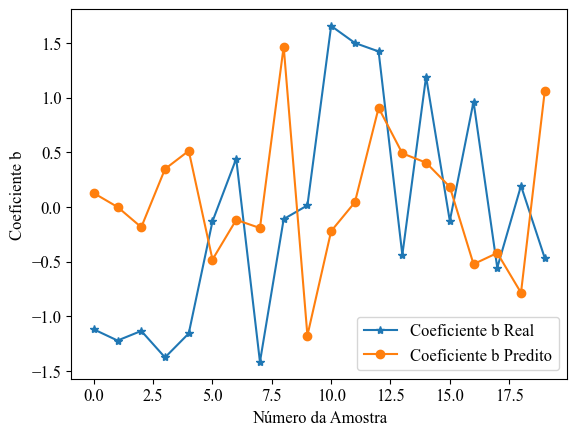

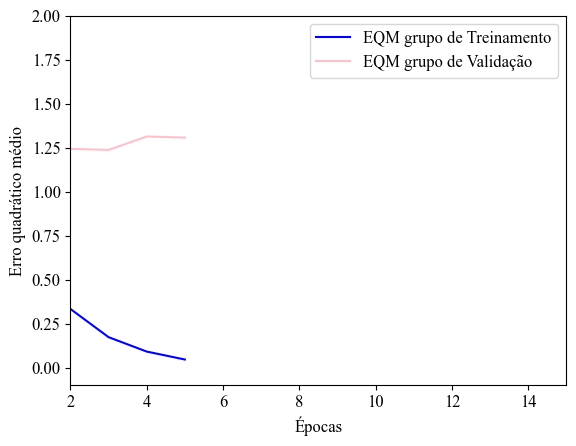

In [ ]:
# Gráfico de Comparação de Coeficiente a
plt.plot(num_amostras, a_real, label='Coeficiente a Real', marker='*')
plt.plot(num_amostras, a_pred, label='Coeficiente a Predito', marker='o')
plt.xlabel('Número da Amostra')
plt.ylabel('Coeficiente a')
plt.rcParams.update({'font.family': 'Times New Roman', 'font.size': 12})
plt.savefig("Comparação a", dpi=300)
plt.legend()
plt.show()

# Gráfico de Comparação de Coeficiente b
plt.plot(num_amostras, b_real, label='Coeficiente b Real', marker='*')
plt.plot(num_amostras, b_pred, label='Coeficiente b Predito', marker='o')
plt.xlabel('Número da Amostra')
plt.ylabel('Coeficiente b')
plt.rcParams.update({'font.family': 'Times New Roman', 'font.size': 12})
plt.savefig("Comparação b", dpi=300)
plt.legend()
plt.show()

# Gráfico de Evolução da Perda durante o Treinamento
plt.plot(history.history['loss'], label='EQM grupo de Treinamento', color='blue')
plt.plot(history.history['val_loss'], label='EQM grupo de Validação', color='pink')
plt.legend(loc='upper right')
plt.xlim(2,15)
plt.ylim(-0.1, 2)
plt.xlabel('Épocas')
plt.ylabel('Erro quadrático médio')
plt.rcParams.update({'font.family': 'Arial', 'font.size': 12})
plt.savefig("EQM", dpi=300)
plt.show()


C:\Users\luisa\AppData\Local\Temp\ipykernel_43728\693841294.py:29: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout(rect=[1, 1, 1, 1])


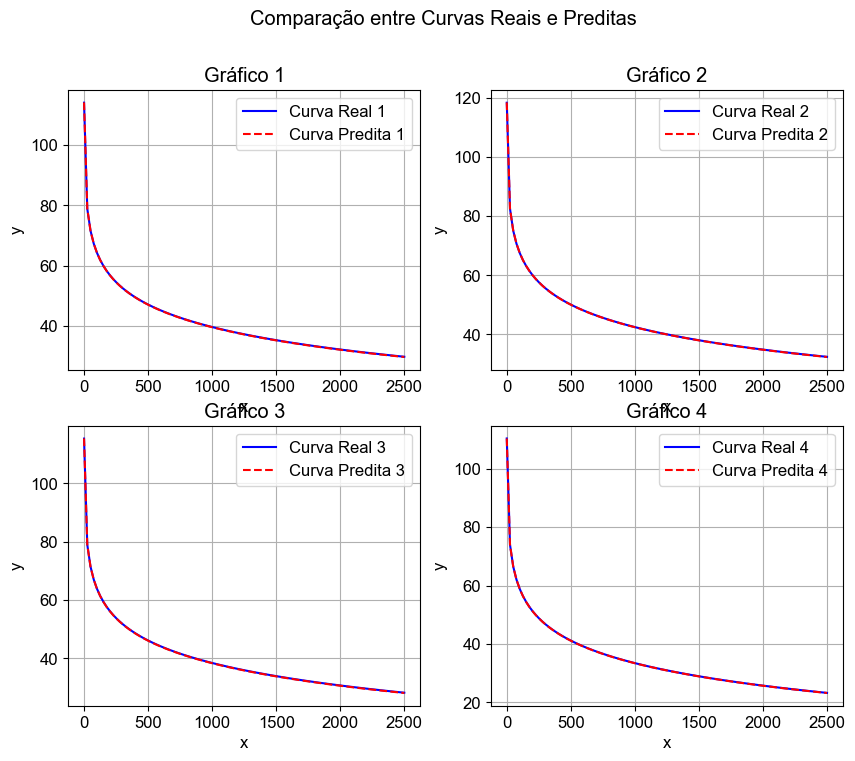

In [87]:
# Subplot com 4 amostras pra plotagem predito x real

import numpy as np
import matplotlib.pyplot as plt

def log_func(x, a, b):
    return a * np.log(x + 1) + b 

x2 = np.linspace(0, 2500, 100)

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('Comparação entre Curvas Reais e Preditas')

indices = [0, 1, 2, 3]
for i, ax in enumerate(axes.flat):
    idx = indices[i]
    y_real_curve = log_func(x2, a_real[idx], b_real[idx])
    y_pred_curve = log_func(x2, a_pred[idx], b_pred[idx])
    
    ax.plot(x2, y_real_curve, linestyle='-', label=f'Curva Real {idx+1}', color='blue')
    ax.plot(x2, y_pred_curve, linestyle='--', label=f'Curva Predita {idx+1}', color='red')
    
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(f'Gráfico {idx+1}')
    ax.legend()
    ax.grid(True)

plt.tight_layout(rect=[1, 1, 1, 1])
plt.savefig("comparacao_curvas.png", dpi=300)
plt.show()


In [ ]:
#Este aqui eu tinha feito só pra adicionar manualmente os coeficientes e comparar, mas tem outro código que coloco como entrada a curva normalizada da IA e sai os coeficientes preditos
#Ele deu erro e estou arrumando, os demais coeficientes calculei separadamente, mas vou organizar este pra já calcular diretamente por aqui.


import numpy as np
import matplotlib.pyplot as plt

# Definir a função logarítmica
def log_func(x, a, b):
    return a * np.log(x + 1) + b

# Gerar valores de x
x2 = np.linspace(0, 2500, 100)
x1 = np.linspace(0, 500, 10)

# Coeficientes reais e preditos
a_sel = -11.7808
b_sel = 113.8869

a_pred_final = -11.0175
b_pred_final = 111.7585

#Valores esperados
a = -11.0897
b = 111.0020

# Curva original (transformando para 1D)
#curvas_selecionadas = np.array([106.7676, 65.3282, 58.1601, 53.9417, 50.9416, 48.6116, 46.7063, 45.0945, 
#             43.6977, 42.4653 ])

# Calcular curvas preditas e ajustadas
y_pred = log_func(x2, a_pred_final, b_pred_final)
y_estendido = log_func(x2, a_sel, b_sel)

y_original = log_func(x2, a, b)
# Plotar curvas
plt.plot(x2, y_pred, linestyle='-', label='Curva predita via IA', color='blue')
plt.plot(x2, y_original, '--', label='Curva original', color='red')  # Adiciona marcadores para clareza
plt.plot(x2, y_estendido, color='orange', label='Curva predita via ajuste numérico')

# Configuração do gráfico
plt.xlabel('Ciclos')
plt.ylabel('Tensão(Mpa)')
plt.legend()
plt.grid(True)
plt.rcParams.update({'font.family': 'Arial', 'font.size': 12})
plt.savefig("Comparação final", dpi=300)
plt.show()
